# 付録

## プログラミング環境

### JupyterとPythonスクリプトの使い分け

 Jupyterは短いコードを逐次実行しながら結果を確認するのには適しているが，コードが長くなると分かりにくくなる．そこで，コードが長くなってきたら関数やクラスに適宜まとめてスクリプト（`.py`ファイル）に保存すると良い．保存したスクリプトはNumPyやPandasと同じようにimportできるので，Jupyter上ではimportしたスクリプト内の関数を実行するだけにすると結果が整理しやすい．その際，以下に説明する自作モジュールの自動リロードの設定をしておくと便利である．
 
※ ローカル環境で`.py`ファイルを編集するにはエディタを使用する．Windowsに標準搭載されているメモ帳を使うのが最も手軽だが，非常に使いづらいので推奨しない．まずは自分の好みに合うエディタを探すことを推奨する．よく使われるエディタは以下の通り：

- Visual Studio Code（推奨）
- Atom
- Sublime Text

### Jupyterのconfigファイル
- ターミナルで以下を実行する
    ```
    jupyter notebook --generate-config
    ```
    - `C:\Users\username\.jupyter`の中に`jupyter_notebook_config.py`というファイルができる．
- `jupyter_notebook_config.py`を開いて以下を追加
    ```
    c=get_config()
    c.NotebookApp.notebook_dir="起動ディレクトリのパス"
    ```
- これにより，Jupyter Labを起動したときに指定したフォルダが開かれる

### Ipythonのプロファイル

Ipythonプロファイルを作成すると，jupyterの起動時に自動実行したいコマンドを設定できる．

- ターミナルで以下を実行する
    ```
    ipython profile create profile_name
    ```
    - `C:\Users\username\.ipython\prifile_name`に`startup`フォルダが作成される．
- `startup`フォルダの中に`00.ipy`というファイル（スタートアップスクリプト）を作り，自動実行したいコマンドを記述する．
- 例えば，以下はよく使うので自動importしておくと良い

    ```python
    import os
    import sys
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    ```
- 自作のモジュール（例えば`my_module.py`）をimportして使う場合，`my_module.py`を一度jupyterでimportした後に，ローカルで`my_module.py`を変更することがよくある．このとき，ローカルで行った変更内容はjupyter側には自動で反映されない．そこで，スタートアップスクリプトに以下を加えておくと自作モジュールの変更が自動で反映される．
  
    ```
    %load_ext autoreload
    %autoreload 2
    %matplotlib inline
    ```

例として，`sport_data`フォルダの中に`module`フォルダを作り，以下のプログラムを`my_module.py`として保存する．

```python
def my_func():
    for i in range(5):
        print("test%s" % i)

if __name__ == '__main__':
    my_func()
```
つまり，このPythonスクリプトのパスは`C:\Users\username\OneDrive\sport_data\module\my_module.py`となる．

これを単にPythonスクリプトとして実行すると，`if __name__ == '__main__':`以下のコマンドが実行される：

```python
%run "./module/my_module.py"
```

一方，これをモジュールとしてインポートするには以下のようにする：

```python
import module.my_module as mm
```

この状態で`my_module`内の関数`my_func()`を以下のように`mm.my_func()`として実行できる：

```python
mm.my_func()
```

スタートアップスクリプト内にautoreloadの設定を書いている場合は，ローカルで`my_module.py`を書き換えたら即座に変更内容が反映されるはずである．

```python
mm.my_func()
```

### Google Colab

Google Colab（正式名称はGoogle Colaboratoty）はgoogleが提供するPython実行環境であり，Jupyter Notebookがベースになっている．
実際，Google Colabで作成したノートブックは".ipynb形式"で保存されるので，相互互換性がある．
Google Colabの特徴は以下の通りである：

- ブラウザ上で動作する
- 基本操作はJupyter Notebookと似ている（細かい操作方法は異なる）
- 作成したノートブックはGoogle Drive上に保存される
    - Google Driveが必要（なのでGoogle アカウントも必要）
- pythonの環境構築が不要（新たにモジュールをインストールすることも可能）
- 無料でGPUを使用可能

特に，Jupyter Notebookの場合は自分のPC上にpython環境を構築する必要があるが，Google Colabはその必要がない点がメリットである．
また，GPUが無料で使用可能なので，重い計算を行う際にも重宝する．
本講義では，基本的にJupyter Labを用いるが，Google Colabを用いても問題ない．

#### Google colabでjupyter notebookを開く

- Google Driveを開いて作業フォルダに移動
- 既存の`.ipynbファイル`を選択するとGoogle Colabが開く
- 新規作成作成の場合は以下
    - ［右クリック］→［その他］→［Google Colaboratory］

#### 必要なモジュールをimportする

- google colabにインストールされていないモジュール（japanize_matplotlibなど）

    ```python
    !pip install japanize-matplotlib
    import japanize_matplotlib
    ```
- 既にインストールされているモジュール

    ```python
    import numpy as np
    ```

#### Google Driveをマウントする

Google Driveに保存した自作モジュールやファイルにアクセスしたい場合はGoogle Driveをマウントする必要がある．

- 以下を実行する
  
    ```python
    from google.colab import drive
    drive.mount('/content/drive')
    ```
- 「このノートブックにGoogleドライブのファイルへのアクセスを許可しますか？」と聞かれるので「Google ドライブに接続」を選択
- 自分のGoogleアカウントを選択し，「許可」を選択

#### 自作モジュールをimportする

```python
import sys
sys.path.append('/content/drive/My Drive/***')

import ***.xxx
```
※ なお，自作モジュールの変更を反映したい場合は［ランタイムを出荷時設定にリセット］し，再度マウントする

#### matplotlibのスタイルファイルを読み込む

```python
import matplotlib.pyplot as plt
plt.style.use('/content/drive/My Drive/***/matplotlibrc')
```

## NumPy

(numpy_fancy_index)=
### ファンシーインデックス参照

インデックス参照では1つの要素だけにしかアクセスできなかった．
また，配列のスライスでは，複数の要素を抽出できたが，連続した要素や1つおきの要素など規則的な抽出しか実現できなかった．
そこで，任意の要素を複数抽出する方法として，ファンシーインデックス参照がある．
これは，複数のインデックスを配列として指定するという方法であり，NumPy配列特有の機能である．

#### 1次元配列の場合

In [ ]:
x = np.random.randint(100, size=10)
x

array([77, 18, 27, 83, 37, 71, 88, 15, 55,  6])

In [ ]:
# 3番目,4番目,7番目要素
x[[3, 4, 7]]

array([83, 37, 15])

In [ ]:
# 3番目,7番目,4番目要素（順番が異なる）
x[[3, 7, 4]]

array([83, 15, 37])

In [ ]:
# 3番目要素を5個
x[[3, 3, 3, 3, 3]]

array([83, 83, 83, 83, 83])

以下のように，インデックスを2次元配列で与えると，抽出された配列も同じ形状となる．

In [ ]:
# 2次元のインデックス配列を与える
x[np.array([[3, 7], [4, 5]])]

array([[83, 15],
       [37, 71]])

#### ２次元配列の場合

通常のインデックス参照と同様に，行→列の順で指定する．
1次元のインデックス配列を指定すると，複数の行を抽出できる．

In [ ]:
x2 = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11]])
x2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
# 第0行と第2行を抽出
x2[[0, 2]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

複数の列を抽出するには，スライスと組み合わせる．

In [ ]:
# 第1列と第3列を抽出
x2[:, [1, 3]]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

2次元配列の複数の要素を一辺に抽出することもできる．
例えば，以下は`x2[0, 2], x2[1, 1], x2[2, 3]`を抽出する例である．

In [ ]:
x2[[0, 1, 2], [2, 1, 3]]

array([ 2,  5, 11])

### 条件を満たす要素のインデックスを取得

`np.where`関数を用いると，配列の中で条件を満たす要素のインデックスを取得することができる．

In [ ]:
x1 = np.random.randint(0, 100, 10)
x1

In [ ]:
np.where(x1 > 50)

この場合，インデックスが0,2,9の要素が条件を満たしている．ただし，上のようにタプルが返るので注意する．

2次元の場合には以下のようになる．

In [ ]:
x2 = np.array([[1,2,3], [4,5,6]])
x2

In [ ]:
np.where(x2 < 4)

この場合，戻り値は`(行方向のインデックス配列, 列方向のインデックス配列)`となる．
つまり，条件を満たすインデックスは`(0, 0), (0, 1), (0, 2)`である．

(numpy_change_shape)=
### 配列の形状変更

#### 要素数を保った形状変更

配列のサイズ（全要素数）を保ったまま形状（次元数）を変更するには`reshape`メソッドを用いる．
例えば，1次元配列を3行3列の配列に変更するには次のようにする．

In [ ]:
x1 = np.arange(1, 10)
x1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# 1次元配列を3行3列に変更
x2 = x1.reshape(3, 3)
x2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

ただし，元の配列と形状変更後の配列のサイズは同じでなければならない．

In [ ]:
print(x1.size)
print(x2.size)

9
9


配列の形状を指定する際に１つの次元だけ`-1`とすると，他の次元から自動的にサイズを補完してくれる

In [ ]:
x1.reshape((-1, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

これを使うと，2次元配列を1次元配列に変更することができる．

In [ ]:
x2.reshape(-1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 配列の連結

複数のNumpy配列を連結するには，`concatenate`関数を用いる．
また，同様の機能を持つ関数として，`block`関数，`vstack`関数，`hstack`関数があるがここでは触れない．

In [ ]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = np.array([99, 99, 99])

In [ ]:
# 2つの1次元配列の連結
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [ ]:
# 複数の1次元配列の連結
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

2次元配列の場合には連結方向を指定する．
連結方向は縦方向（行方向）の場合`axis=0` ，横方向（列方向）の場合`axis=1`とする．

In [ ]:
x2 = np.array([[1,2,3], [4,5,6]])
y2 = np.array([[7,8,9], [10,11,12]])

In [ ]:
# 縦（行方向）に連結
np.concatenate([x2, y2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
# 横（列方向）に連結
np.concatenate([x2, y2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

#### 配列の削除

`np.delete`関数で配列から任意の行や列を削除できる．

In [ ]:
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
# 第1行を削除
np.delete(x, 1, axis=0)

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [ ]:
# 第0行と1行を削除
np.delete(x, [0, 1], 0)

array([[ 8,  9, 10, 11]])

In [ ]:
# 第1列を削除
np.delete(x, 1, axis=1)

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11]])

In [ ]:
# 第1列と第3列を削除
np.delete(x, [1, 3], axis=1)

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

(numpy_broadcast)=
### 異なる形状の配列間での演算：ブロードキャスト

NumPy配列では以上の規則を含む**ブロードキャスト**と呼ばれる演算規則が存在する．
ブロードキャストとは，異なる形状・サイズの配列同士で演算を行う場合に，一方または両方の配列の形状・サイズを自動的に変更（ブロードキャスト）する仕組みである．

ブロードキャストは以下のルールに従う：
- ルール1：2つの配列の次元数（ndim）を揃える
    - ２つの配列の次元数（ndim）が異なる場合，次元数が少ない方の配列の次元を1つ増やす．
    - 増やした次元のサイズは1とする．
- ルール2：2つの配列の形状（shape）を揃える
    - 2つの配列の各次元の長さが異なる場合，サイズが1の次元に限り他方の配列に合うようにサイズを引き伸ばす．
    - これにより形状が合わない場合はエラーとなる．

In [4]:
x2 = np.array([[1,2,3], [4,5,6]])
print('shape:', x2.shape)
print('ndim:', x2.ndim)
x2

shape: (2, 3)
ndim: 2


array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
y1 = np.array([[1], [2]])
print('shape:', y1.shape)
print('ndim:', y1.ndim)
y1

shape: (2, 1)
ndim: 2


array([[1],
       [2]])

In [6]:
z1 = np.array([1, 2, 3])
print('shape:', z1.shape)
print('ndim:', z1.ndim)
z1

shape: (3,)
ndim: 1


array([1, 2, 3])

In [7]:
# 形状(2, 3)と(2, 1)
x2+y1

array([[2, 3, 4],
       [6, 7, 8]])

In [8]:
# 形状(2, 3)と(1, 3)
x2+z1

array([[2, 4, 6],
       [5, 7, 9]])

In [9]:
# 形状(2, 1)と(1, 3)
y1+z1

array([[2, 3, 4],
       [3, 4, 5]])

以下はエラーになる

In [10]:
x2_2 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print('shape:', x2_2.shape)
print('ndim:', x2_2.ndim)
x2_2

shape: (3, 3)
ndim: 2


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [11]:
# 形状(3, 3)と(2, 1)：エラーが出る
x2_2 + y1

ValueError: operands could not be broadcast together with shapes (3,3) (2,1) 

## Pandas

### Seriesオブジェクト

Pandasには，DataFrameの他に1次元のデータを扱うためのSeriesオブジェクトが用意されている．DataFrameには行ラベルindexと列ラベルcolumnsが付与されたが，**Seriesにはindexだけが付与される**．**SeriesはDataFrameから特定の1列を抜き出したものであり，基本的な操作方法はDataFrameと同じである**．実際のデータ分析においてSeriesを単体で用いることはあまりないが，DataFrameを１列だけ取り出したり，ブールインデックスを扱ったりすると遭遇する．

SeriesはDataFrameから1列または1行を取り出すことで生成できる．
また，`pd.Series`関数により，リスト，NumPy配列，辞書などから生成することもできる．

In [ ]:
df = pd.read_csv('./4_pandas/df_sample.csv',\
                 header=0, index_col=0, usecols=None)
df['t']

A      2
B     64
C    350
D    600
Name: t, dtype: int64

In [ ]:
type(df['t'])

pandas.core.series.Series

In [ ]:
# リストから作成
sr = pd.Series([0.25, 0.5, 0.75, 1.0],
               index = ['A', 'B', 'C', 'D'])
sr

A    0.25
B    0.50
C    0.75
D    1.00
dtype: float64

Seriesオブジェクトの属性や参照の方法はDataFrameと同じである．

In [ ]:
# NumPy配列に変換
sr.values

array([0.25, 0.5 , 0.75, 1.  ])

In [ ]:
# ラベルを取得
sr.index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
# ラベル'A'の要素を取り出す
sr['A']

0.250

In [ ]:
# loc属性でラベル'A'の要素を取り出す
sr.loc['A']

0.250

In [ ]:
# iloc属性で0番目要素を取り出す
sr.iloc[0]

0.250

### 指定したラベルの順に並べ替える：`reindex`メソッド

`reindex`メソッドを用いると，指定した行・列ラベルの順番にDataFrameを並べ替えることができる．<br>
なお，単にラベルを昇順・降順に並べ替えたい場合は既に説明した`sort_index`メソッドを用いた方が良い．

In [ ]:
# 指定した行ラベルの順に並び替え
df.reindex(index=[0, 1, 2, 3])

,b,c,a
0,3,4,5
1,9,10,11
2,6,7,8
3,0,1,2


In [ ]:
# 指定した列ラベルの順に並び替え
df.reindex(columns=['c', 'a', 'b'])

,c,a,b
3,1,2,0
0,4,5,3
2,7,8,6
1,10,11,9


In [ ]:
# 新たなラベルの指定
df.reindex(index=[0, 1, 2, 3, 4, 5])

,b,c,a
0,3.0,4.0,5.0
1,9.0,10.0,11.0
2,6.0,7.0,8.0
3,0.0,1.0,2.0
4,NaN,NaN,NaN
5,NaN,NaN,NaN


In [ ]:
# 新たなラベルを指定し，欠損値を穴埋め
df.reindex(index=[0, 1, 2, 3, 4, 5], fill_value=0)

,b,c,a
0,3,4,5
1,9,10,11
2,6,7,8
3,0,1,2
4,0,0,0
5,0,0,0


### データの結合

複数のDataFrameがあったとき，これらを結合する方法として，`concat`関数，`merge`関数，`join`関数が用意されている．
`concat`関数は縦方向と横方向に連結ができる．
一方，`merge`関数と`join`関数は横方向に連結する関数であり，`merge`関数は特定の列，`join`関数はindexを基準に連結する．
ここでは，`concat`関数だけを説明する．

**`concat`関数**

`concat`関数は次の形式で実行する：
```python
pd.concat([df1, df2, ...], axis=0, join='outer')
```
`axis`引数に0を指定すると縦方向，1を指定すると横方向に連結される（デフォルトは0）．
`join`引数は`'outer'`または`'inner'`を指定する（デフォルトは`'outer'`）．挙動は以下で説明する．

In [ ]:
df1 = pd.DataFrame(np.arange(0, 6).reshape(2, 3),
                   columns=['a', 'b', 'c'])
df1

,a,b,c
0,0,1,2
1,3,4,5


In [ ]:
# 列ラベルが一部異なるDataFrame
df2 = pd.DataFrame(np.arange(6, 12).reshape(2, 3),
                   columns=['a', 'e', 'f'])
df2

,a,e,f
0,6,7,8
1,9,10,11


In [ ]:
# 行ラベルが一部異なるDataFrame
df3 = pd.DataFrame(np.arange(6, 12).reshape(2, 3), 
                   columns=['d', 'e', 'f'],
                   index=[1, 2])
df3

,d,e,f
1,6,7,8
2,9,10,11


**縦方向の連結（`axis=0`）**

縦に連結する場合は`axis=0`を指定する．列ラベル（columns）が同じ場合，そのまま縦に連結される．連結するDataFrameは2個以上でも良い．

In [ ]:
# 縦に連結（列ラベルが同じ場合）
pd.concat([df1, df1, df1], axis=0)

,a,b,c
0,0,1,2
1,3,4,5
0,0,1,2
1,3,4,5
0,0,1,2
1,3,4,5


列ラベルが一部異なる場合，新たな列が追加される．

In [ ]:
# 縦に連結（列ラベルが一部異なる場合）
pd.concat([df1, df2], axis=0)

,a,b,c,e,f
0,0,1.0,2.0,NaN,NaN
1,3,4.0,5.0,NaN,NaN
0,6,NaN,NaN,7.0,8.0
1,9,NaN,NaN,10.0,11.0


`join='inner'`を指定すると，ラベルが共通の列だけが残る．

In [ ]:
# 縦に連結（列ラベルが一部異なる場合）
pd.concat([df1, df2], axis=0, join='inner')

,a
0,0
1,3
0,6
1,9


**横方向の連結（axis=1）**

横に連結する場合は`axis=1`を指定する．行ラベル（index）が同じ場合，そのまま横に連結される．

In [ ]:
# 横に連結（行ラベルが同じ場合）
pd.concat([df1, df1], axis=1)

,a,b,...,b,c
0,0,1,...,1,2
1,3,4,...,4,5


行ラベルが一部異なる場合，新たな行が追加される

In [ ]:
# 横に連結（行ラベルが一部異なる場合）
pd.concat([df1, df3], axis=1)

,a,b,...,e,f
0,0.0,1.0,...,NaN,NaN
1,3.0,4.0,...,7.0,8.0
2,NaN,NaN,...,10.0,11.0


`join='inner'`を指定すると，ラベルが共通の行だけが残る．

In [ ]:
# 横に連結（行ラベルが同じ場合）
pd.concat([df1, df3], axis=1, join='inner')

,a,b,...,e,f
1,3,4,...,7,8


### データの重複処理

**重複データの削除（`drop_duplicates`メソッド）**

pandasで重複したデータを削除するには`drop_duplicates`メソッドを用いる．`drop_duplicates`メソッドは以下のように指定する：
```
    df.drop_duplicates(keep='first', subset=['列名1', '列名2', ...])
```
`keep`引数は重複した複数行のうち，削除しないで残す（keepする）行を指定する．デフォルトでは`keep='first'`となっており，重複した行のうち最初の行が残る．`keep='last'`とすると最後の行が残り，`keep=False`とすれば重複する全ての行が削除される．
また，デフォルトでは全ての列の値が一致しているときに重複と見なされるが，特定の列だけで判断したい場合は`subset`引数に列名のリストを指定する．

In [ ]:
dict_data = {'t':[2, 64, 64, 350, 600, 600, 600],    
             'player':['ozora', 'misaki', 'misaki', 'wakabayashi', 'hyuga', 'hyuga', 'hyuga'],
             'x':[5.0, 20.0, 20.0, 10.5, 32.5, 32.5, 32.5],
             'y':[10.0, 1.0, 1.0, 50.5, 2.5, 2.5, 2.5]}
df = pd.DataFrame(dict_data)
df

,t,player,x,y
0,2,ozora,5.0,10.0
1,64,misaki,20.0,1.0
2,64,misaki,20.0,1.0
3,350,wakabayashi,10.5,50.5
4,600,hyuga,32.5,2.5
5,600,hyuga,32.5,2.5
6,600,hyuga,32.5,2.5


In [ ]:
# 重複する最初の行を残す
df.drop_duplicates(keep='first', subset=None)

,t,player,x,y
0,2,ozora,5.0,10.0
1,64,misaki,20.0,1.0
3,350,wakabayashi,10.5,50.5
4,600,hyuga,32.5,2.5


In [ ]:
# 重複する最後の行を残す
df.drop_duplicates(keep='last', subset=None)

,t,player,x,y
0,2,ozora,5.0,10.0
2,64,misaki,20.0,1.0
3,350,wakabayashi,10.5,50.5
6,600,hyuga,32.5,2.5


In [ ]:
# 重複する全ての行を削除
df.drop_duplicates(keep=False, subset=None)

,t,player,x,y
0,2,ozora,5.0,10.0
3,350,wakabayashi,10.5,50.5


**重複データの検出（`duplicated`メソッド）**

重複したデータを検出するには`duplicated`メソッドを用いる．`duplicated`メソッドは以下のように指定する：
```
    df.duplicated(keep='first', subset=['列名1', '列名2', ...])
```
`duplicated`メソッドを適用すると，重複した行をTrue，それ以外の行をFalseとするブール値のSeriesが得られる．
`keep`引数は重複した複数行のうち，検出しない行を指定する（重複を削除するときに残る行なのでkeep)．デフォルトでは`keep='first'`となっており，重複した行のうち最初の行がFalseとなる．`keep='last'`とすると最後の行がFalseとなり，`keep=False`とすれば重複する全ての行がTrueとなる．
また，デフォルトでは全ての列の値が一致しているときに重複と見なされるが，特定の列だけで判断したい場合は`subset`引数に列名のリストを指定する．

In [ ]:
df.duplicated(keep=False, subset=None)

0    False
1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

In [ ]:
df.duplicated(keep='first', subset=None)

0    False
1    False
2     True
3    False
4    False
5     True
6     True
dtype: bool

In [ ]:
df.duplicated(keep='last', subset=None)

0    False
1     True
2    False
3    False
4     True
5     True
6    False
dtype: bool

In [ ]:
df.duplicated(keep=False, subset=['t', 'player', 'x'])

0    False
1     True
2     True
3    False
4     True
5     True
6     True
dtype: bool

重複した行はブールインデックス参照によって抽出できる．

In [ ]:
# 重複する全ての行を検出
df.loc[df.duplicated(keep=False, subset=None)]

,t,player,x,y
1,64,misaki,20.0,1.0
2,64,misaki,20.0,1.0
4,600,hyuga,32.5,2.5
5,600,hyuga,32.5,2.5
6,600,hyuga,32.5,2.5


In [ ]:
# 重複する最初の行は検出しない
df.loc[df.duplicated(keep='first', subset=None)]

,t,player,x,y
2,64,misaki,20.0,1.0
5,600,hyuga,32.5,2.5
6,600,hyuga,32.5,2.5


In [ ]:
# 重複する最後の行は検出しない
df.loc[df.duplicated(keep='last', subset=None)]

,t,player,x,y
1,64,misaki,20.0,1.0
4,600,hyuga,32.5,2.5
5,600,hyuga,32.5,2.5


## Matplotlib
(matplotlib_output)=
### 描画結果の出力先

Matplotlibは使う環境によってグラフを画面に出力する方法が異なる．
ここではJupyter NotebookとPythonスクリプトでの出力方法を解説する．

**（デフォルト）Jupyter Labで実行し，Notebook内に表示する**

Jupyterのマジックコマンド`%matplotlib`の後に`inline`を指定すると，コードセルの下に描画結果が表示される．
デフォルトではこの設定になっているはずである．

In [ ]:
# notebook内に出力する
%matplotlib inline

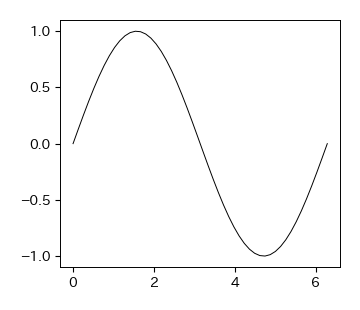

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi)
plt.plot(x, np.sin(x));

**Jupyter Labで実行し，別ウインドウに表示する**

Jupyterのマジックコマンド`%matplotlib`の後に`tk`を指定すると，描画結果が別画面に出力される．

In [12]:
# 別ウインドウに出力する
%matplotlib tk

なお，'inline'や'tk'はバックエンドと呼ばれ，以下が利用可能である．

In [13]:
# 現在のバックエンドを確認
print(matplotlib.get_backend())

TkAgg


In [14]:
# 利用可能なバックエンドのリストを表示
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


(matplotlib_style)=
### ２つのプロットスタイル

**FigureとAxes**

Matplotlibの描画エリアは下図のようにFigureオブジェクト, Axesオブジェクトという要素で構成されている．
Figureは描画エリア全体を表し，その中に複数のAxes（座標軸）が存在するという構造になっている．
グラフのプロットや装飾はAxesオブジェクト（座標軸）のメソッドを用いて行う．

```{figure} ../figure/fig_axes.png
---
height: 250px
name: fig:fig_axes
---
MatplotlibにおけるFigureオブジェクトとAxesオブジェクト
```

Matplotlibには２つのプロットスタイルが存在し，方法１を**オブジェクト指向スタイル**，方法２を**MATLABスタイル**と呼ぶ．
オブジェクト指向スタイルでは，FigureオブジェクトとAxesオブジェクトを明示的に生成し，生成したオブジェクトのメソッドを用いてグラフを作成する．
この方法は，ややコードが長くなるが，グラフの細部の調整を行いたい場合に便利である．
一方，MATLABスタイルはFigureオブジェクトとAxesオブジェクトを明示的に生成しないので，手軽にプロットできるが，複雑なグラフや細かい調整を行うには不便である．
**本講義では，オブジェクト指向スタイルを採用する．**

**（推奨）方法１：オブジェクト指向スタイル**

オブジェクト指向スタイルでは，FigureオブジェクトとAxesオブジェクトを明示的に生成した上で，生成したオブジェクトのメソッドを用いてプロットを行う．
基本的には以下の手順に従う．

1. FigureオブジェクトとAxesオブジェクトを生成する
    ```python
    fig, ax = plt.subplots(figsize=(4, 3))
    ```
2. Axesオブジェクトのメソッドを用いてプロットする
    ```python
    ax.plot(x, y, option)
    ax.bar(x, y, option)
    ```
3. Axesを装飾する
    ```python
    ax.set_xlim(xmin, xmax)
    ax.set_xlabel('X')
    ```
4. Figureを保存する
    ```python
    fig.savefig('abc.pdf', dpi=80, transparent=True, bbox_inches='tight', pad_inches=0.2)
    ```

In [ ]:
# FigureとAxesを生成する
fig, ax = plt.subplots()

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

# Axesを装飾する
ax.set_xlabel('X'); ax.set_ylabel('Y')

# Figureを保存する
fig.savefig('./5_matplotlib/1_axes.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

**（非推奨）方法２：MATLABスタイル**

MATLABスタイルの場合，FigureとAxesの生成は自動的に行われる．
オブジェクト指向スタイルでは生成したAxesに対して`ax.plot()`のようにプロットしたが，
MATLABスタイルでは，プロット，装飾，保存など全てのコマンドが`plt.`から始まる．
特に，グラフの装飾のコマンドに`set_`が付かないことに注意する．

In [ ]:
# プロットする
x = np.linspace(0, 2*np.pi)
plt.plot(x, np.sin(x))
plt.plot(x, 2*np.sin(x))

# Axesを装飾する
plt.xlabel('X'); plt.ylabel('Y')

# Figureを保存する
plt.savefig('./5_matplotlib/1_axes.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

### FigureとAxesの生成

**FigureとAxesを同時に生成**

`plt.subplots(nrows, ncols, option)`により，FigureとAxesを同時に生成できる．
通常は`nrows`と`ncols`を省略し，`fig, ax = plt.subplots()`のようにして1つのAxesだけを生成する．
複数のAxesを生成した場合は`nrows`に縦方向の分割数，`ncols`に横方向の分割数を指定する．
例えば，`nrows=2, ncols=3`とすると，2×3=6個のAxesが生成される．
これ以外に以下のオプションがある．

| オプション | 内容 | 指定の仕方 |
| ---- | ---- | ---- | 
| figsize | Figureのサイズ | (width, height) |
| facecolor | 背景の色 | 'white'（デフォルト）, 'red'など |
| tight_layout | 余白の自動調整 | True or False |
| linewidth | 枠線の太さ | 数値 |
| edgecolor | 枠線の色 | 'black', Noneなど |

In [ ]:
# Figureと1つのAxesを生成する
fig, ax = plt.subplots()

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))

# Axesを装飾する
ax.set_xlabel('X'); ax.set_ylabel('Y')

# Figureを保存する
# fig.savefig('./5_matplotlib/1_axes.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300)

Text(0, 0.5, 'Y')

In [ ]:
'''複数のAxes'''

# Figureと複数のAxesを生成する
fig, axs = plt.subplots(1, 2, figsize=(7, 2), facecolor='white', tight_layout=True)

# Axesに対してプロットする
x = np.linspace(0, 2*np.pi)
axs[0].plot(x, np.sin(x))
axs[1].plot(x, np.cos(x))

# Axesを装飾する
axs[0].set_xlabel('X'); axs[0].set_ylabel('Y')
axs[1].set_xlabel('X'); axs[1].set_ylabel('Y')

# Figureを保存する
# fig.savefig('./5_matplotlib/2_axes.pdf', bbox_inches='tight')

Text(0, 0.5, 'Y')

**Figureを生成して，後からAxesを追加**

`fig = plt.figure()`でFigureのみを生成できる．オプションは`plt.subplots()`と同じ．
また，`fig.add_subplot(LMN)`でAxesを1つずつ追加できる．
ここで，Lは行方向の分割数，Mは列方向の分割数，Nは追加したいAxesの番号を表す．

In [ ]:
# Figureの生成
fig = plt.figure(figsize=(7, 2))

# Axesの追加
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Axesに対するプロット
x = np.linspace(0, 2*np.pi)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

# Axesの装飾
ax1.set_xlabel('X'); ax1.set_ylabel('Y')
ax2.set_xlabel('X'); ax2.set_ylabel('Y')

# Figureの保存
# fig.savefig('./5_matplotlib/2_axes.pdf', bbox_inches='tight')

Text(0, 0.5, 'Y')

## イベントデータの解析

(pappalardo)=
### Pappalardoデータセットの詳細

#### データセットに関する情報の入手先

Pappalardoデータセットに含まれる全てのデータおよび付加情報は以下で取得できる．

- [データセットの詳細をまとめた論文](https://doi.org/10.1038/s41597-019-0247-7)
  - Pappalardo, L., Cintia, P., Rossi, A. et al. A public data set of spatio-temporal match events in soccer competitions. Sci Data 6, 236 (2019).
- [データの入手先（figshare）](https://figshare.com/collections/Soccer_match_event_dataset/4415000/5)
    - ページ最上部でデータセットのバージョンを選択できる（2023年6月現在の最新版はVersion 5）
    - ページ最下部からzipファイルやjsonファイルをダウンロードできる
- [Wyscout API](https://apidocs.wyscout.com)
    - Wyscout社のサポートページ
    - 各データに関する詳細な情報を掲載
- [日本語の解説サイト](https://exploratory.io/note/1021500949444839/Soccer-Analytics-01-Data-Description-OGp4kBq4Va/note_content/note.html
)
    - 日本語によるデータセットの詳細な説明（作成者に感謝）
    - 一部に情報が古い部分がある

#### データセットの内容

Pappalardoデータセットに含まれる試合は2017年度ヨーロッパリーグ，2018年度FIFAW杯，2016年度UEFAチャンピオンズリーグの全1941試合である．

| リーグ・大会名 | シーズン | 試合数 | イベント数 | 選手数 |
| ---- | ---- | ---- | ---- | ---- |
| スペイン１部リーグ| 2017-18 | 380 | 628659 | 619 |
| イングランド１部リーグ| 2017-18 | 380 | 643150 | 603 |
| イタリア１部リーグ| 2017-18 | 380 | 647372 | 686 |
| ドイツ１部リーグ| 2017-18 | 380 | 519407 | 537 |
| フランス１部リーグ| 2017-18 | 380 | 632807 | 629 |
| FIFA World Cup | 2018 | 64 | 101759 | 736 |
| UEFA Euro Cup | 2016 | 51 | 78140 | 552 |
| 計 |  | 1941 | 3251294 | 4299 |

Pappalardoデータセットには，下表のようなデータが含まれている．

| データ | ファイル形式 |
| ---- | ---- |
| イベントデータ．ボールに関わるイベントの発生時刻，位置，付加情報 | `events_competition-name.json` |
| リーグ・大会の情報 | `competitions.json` |
| 出場チームの情報 | `teams.json` |
| 出場選手の情報 | `players.json` |
| 審判の情報 | `referees.json` |
| コーチの情報 | `coaches.json` |
| イベントIDとイベント名の対応表 | `eventid2name.csv` |
| イベントに付与されるタグの説明 | `tags2name.csv` |

#### 加工済みデータの内容

加工済みデータの詳細およびダウンロード用リンクを以下にまとめる．<br>
※ W杯とCLのデータはヨーロッパリーグと試合数が異なるので除外する．

| 内容 | ファイル | ファイルサイズ |
| ---- | ---- | ---- |
| 選手のプロフィールデータ |  [player.csv](https://drive.google.com/uc?export=download&id=1rtCAL0DqW9SeslMuGFCusg8VRRWz6J_M) | 172KB |
| チームのプロフィールデータ |  [team.csv](https://drive.google.com/uc?export=download&id=1gzjVMRX3daVVFEsNlz-ipidyw-tM2zr1) | 4KB |
| 各試合の得点データ |  [game.csv](https://drive.google.com/uc?export=download&id=1gueZANYM2wOkQefKpoA_LplKkG0aXA4A) | 156KB |
| イベントIDとイベント名の対応 | [event_list.csv](https://drive.google.com/uc?export=download&id=1oSDUt73paDOsORVj732rGU0vwIwGHvHJ) | 0.9KB |
| イベントに付与されるタグの説明 | [tag_list.csv](https://drive.google.com/uc?export=download&id=1o_tZ-y0eAYlgN1audJThoVBMN0Ta2x5f) | 2KB |
| 各試合のイベントデータ（イングランド） | イベントログ：[event_England.csv](https://drive.google.com/uc?export=download&id=1783Zl4IRGmiYmo-uLA1-FsZwGesOsFhg) <br>イベントタグ：[event_tag_England.csv](https://drive.google.com/uc?export=download&id=17LhNNVGZ9nsm-d3lqfBWiKmEqGitJwVI) | 58MB <br> 76.2MB |
| //（フランス）                         | イベントログ：[event_France.csv](https://drive.google.com/uc?export=download&id=17B8fTf8E7W56USHRObhRaeYBDqatDaft) <br> イベントタグ：[event_tag_France.csv](https://drive.google.com/uc?export=download&id=17Sq34wx_Ge_9tVyJYFup1XixwneoWjaO)| 57.6MB <br> 74.8MB |
| //（ドイツ）                            | イベントログ：[event_Germany.csv](https://drive.google.com/uc?export=download&id=17GVyiEgRFW9VZstK5LvEKLuKTuWmKe1Z) <br>イベントタグ：[event_tag_Germany.csv](https://drive.google.com/uc?export=download&id=17dGXdEp0yNH1ySRCcB9ydLxcmUAESFHy)| 47.2MB <br> 61.5MB |
| //（イタリア）                         | イベントログ：[event_Italy.csv](https://drive.google.com/uc?export=download&id=17C5vUbS9_zRWpgTalUNzWfP6oFXf0U3K) <br>イベントタグ：[event_tag_Italy.csv](https://drive.google.com/uc?export=download&id=17cH2MUqBDdWeBnTGK2EFYEfmB-GAxC3M)| 58.9MB <br> 76.6MB |
| //（スペイン）                         | イベントログ：[event_Spain.csv](https://drive.google.com/uc?export=download&id=17K-vF4xBn6GtBtFap5sIf26ZZnjs20fz) <br>イベントタグ：[event_tag_Spain.csv](https://drive.google.com/uc?export=download&id=17lGhSTFByywubBTmJKoTzrmaGLOgOZ3k)| 56.1MB <br> 74.5MB |